In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.interpolate as si

In [2]:
import sys
sys.path.append('../')
import bargo.datasets as datasets

In [6]:
def get_sides(Y):
    n = len(Y)
    n4 = n//4
    n8 = n//8

    right = np.append(Y[-n8:-1], [Y[-1]], axis=0)
    right = np.append(right, Y[0:n8+1], axis=0)
    upper = Y[n8:n8+n4+1][::-1]
    left = Y[n8+n4:n8+n4+n4+1][::-1]
    lower = Y[n8+n4+n4:n8+n4+n4+n4+1]
    return right, upper, left, lower

Y = datasets.flower(2000, 1, 0.3, 5) * 1.2
# Y = datasets.elephant(128, 1, 0.5)
right, upper, left, lower = get_sides(Y)

In [7]:
def transfinite(lower, upper, left, right):
    """Make a transfinite interpolation.

    http://en.wikipedia.org/wiki/Transfinite_interpolation

    Args:
        lower (list): List of (x, y) tuples describing the lower bound
        upper (list): List of (x, y) tuples describing the upper bound
        left (list): List of (x, y) tuples describing the left bound
        right (list): List of (x, y) tuples describing the right bound

    Example input for the lower boundary:
        lower = [(0.0, 0.0), (0.1, 0.3),  (0.5, 0.4)]
    """

    lower = np.array(lower)
    upper = np.array(upper)
    left = np.array(left)
    right = np.array(right)

    # interpolate B-spline through data points
    # here, a linear interpolant is derived "k=1"
    # splprep returns:
    # tck ... tuple (t,c,k) containing the vector of knots,
    #         the B-spline coefficients, and the degree of the spline.
    #   u ... array of the parameters for each given point (knot)
    tck_left, u_left = si.splprep(left.T, s=0, k=1)
    tck_right, u_right = si.splprep(right.T, s=0, k=1)
    tck_lower, u_lower = si.splprep(lower.T, s=0, k=1)
    tck_upper, u_upper = si.splprep(upper.T, s=0, k=1)

    # evaluate function at any parameter "0<=t<=1"
    def eta_left(t):
        return np.array(si.splev(t, tck_left, der=0))

    def eta_right(t):
        return np.array(si.splev(t, tck_right, der=0))

    def xi_bottom(t):
        return np.array(si.splev(t, tck_lower, der=0))

    def xi_top(t):
        return np.array(si.splev(t, tck_upper, der=0))

    nodes = np.zeros((len(u_left) * len(u_lower), 2))

    # corner points
    c1 = xi_bottom(0.0)
    c2 = xi_top(0.0)
    c3 = xi_bottom(1.0)
    c4 = xi_top(1.0)

    for i, xi in enumerate(u_lower):
        xi_t = u_upper[i]
        for j, eta in enumerate(u_left):
            eta_r = u_right[j]

            node = i * len(u_left) + j

            # formula for the transinite interpolation
            point = (1.0 - xi) * eta_left(eta) + xi * eta_right(eta_r) + \
                (1.0 - eta) * xi_bottom(xi) + eta * xi_top(xi_t) - \
                ((1.0 - xi) * (1.0 - eta) * c1 + (1.0 - xi) * eta * c2 +
                 xi * (1.0 - eta) * c3 + xi * eta * c4)

            nodes[node, 0] = point[0]
            nodes[node, 1] = point[1]

    return nodes

In [8]:
nodes = transfinite(lower, upper, left, right)

In [9]:
lower = np.array(lower)
upper = np.array(upper)
left = np.array(left)
right = np.array(right)

Text(0.5, 1.0, 'Outline of a block')

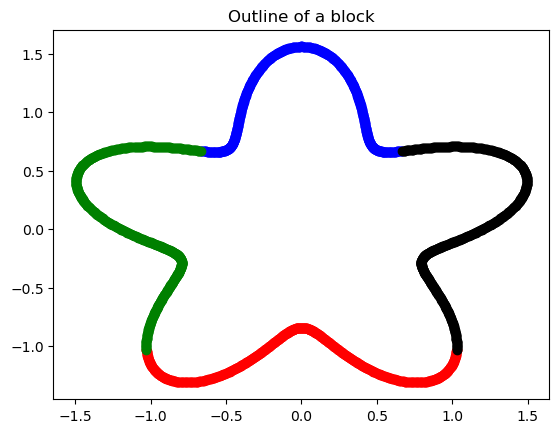

In [10]:
plt.plot(lower[:, 0], lower[:, 1], 'r', marker='o', clip_on=False)
plt.plot(upper[:, 0], upper[:, 1], 'b', marker='o', clip_on=False)
plt.plot(left[:, 0], left[:, 1], 'g', marker='o', clip_on=False)
plt.plot(right[:, 0], right[:, 1], 'k', marker='o', clip_on=False)
plt.title('Outline of a block')

In [11]:
vlines = list()
vline = list()
i = 0
for node in nodes:
    i += 1
    vline.append(node)
    if i%len(right) == 0:
        vlines.append(vline)
        vline = list()
        
ulines = list()
uline = list()
for i in range(len(vlines[0])):
    for vline in vlines:
        uline.append(vline[i])
    ulines.append(uline)
    uline = list()

Text(0.5, 1.0, 'Points created by TFI')

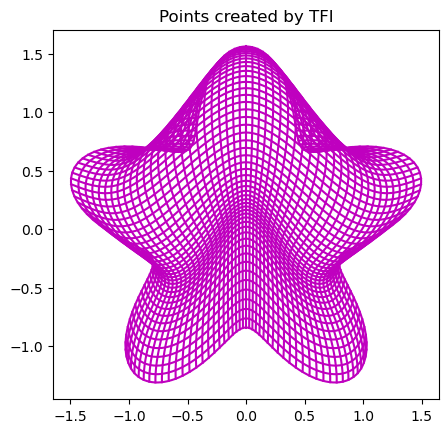

In [13]:
for vline in vlines[::10]:
    plt.plot(np.array(vline)[:, 0], np.array(vline)[:, 1], 'm')

for uline in ulines[::10]:
    plt.plot(np.array(uline)[:, 0], np.array(uline)[:, 1], 'm')

# plt.plot(nodes[:, 0], nodes[:, 1], 'mo', zorder=1, clip_on=False)
plt.gca().set_aspect('equal')
plt.title('Points created by TFI')

In [3]:
import bargo.engine

2024-05-26 21:59:49.385267: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
bargo.engine.NN.diffeomorphism(1, 2, 3)

(None, 2)


KeyError: 'units'